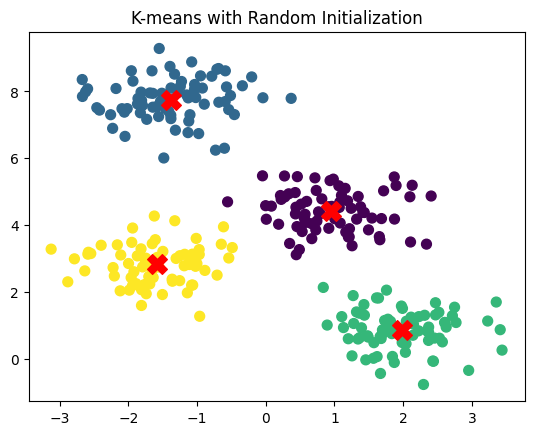

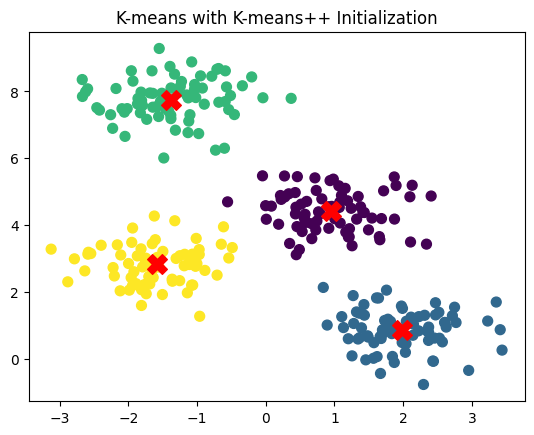

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate a sample dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Function to plot clustering results
def plot_kmeans(X, labels, centroids, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')
    plt.title(title)
    plt.show()

# K-means with random initialization
kmeans_random = KMeans(n_clusters=4, init='random', n_init=10, random_state=0)
labels_random = kmeans_random.fit_predict(X)
centroids_random = kmeans_random.cluster_centers_
plot_kmeans(X, labels_random, centroids_random, "K-means with Random Initialization")

# K-means with K-means++ initialization
kmeans_plusplus = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=0)
labels_plusplus = kmeans_plusplus.fit_predict(X)
centroids_plusplus = kmeans_plusplus.cluster_centers_
plot_kmeans(X, labels_plusplus, centroids_plusplus, "K-means with K-means++ Initialization")

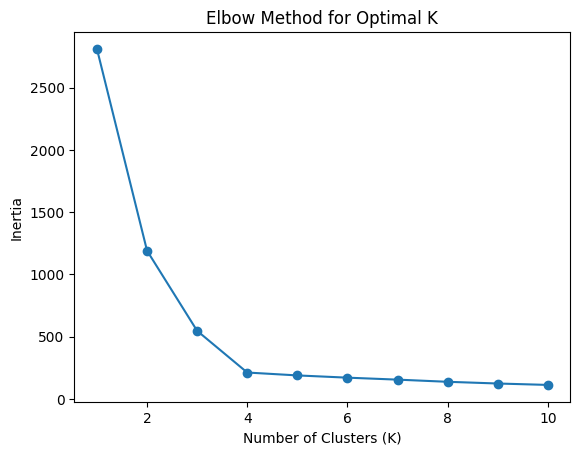

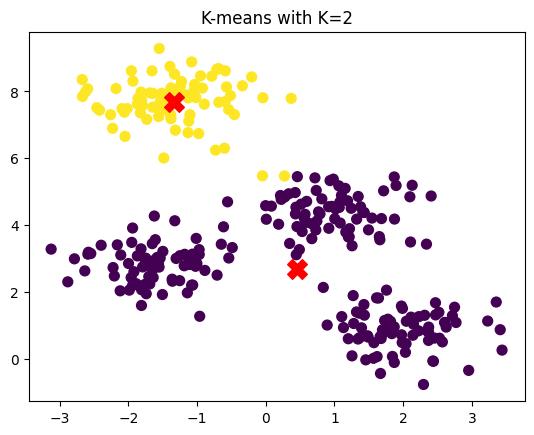

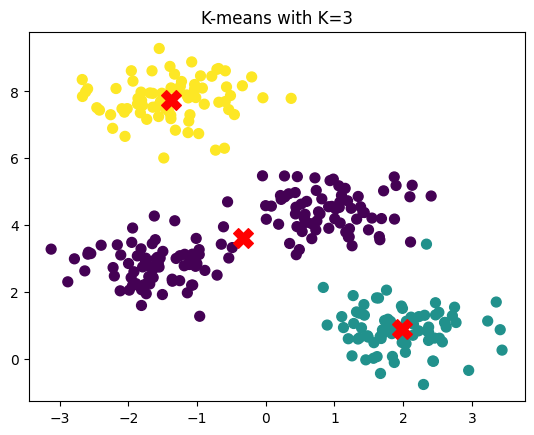

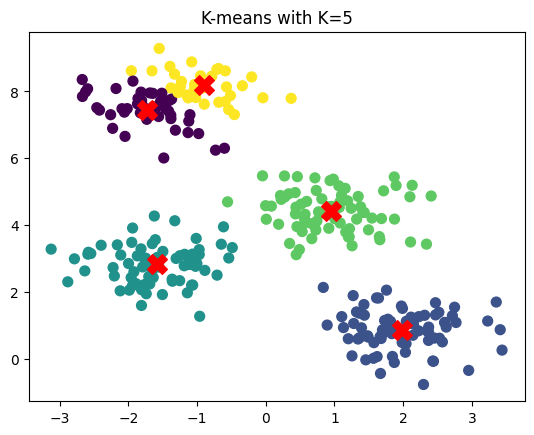

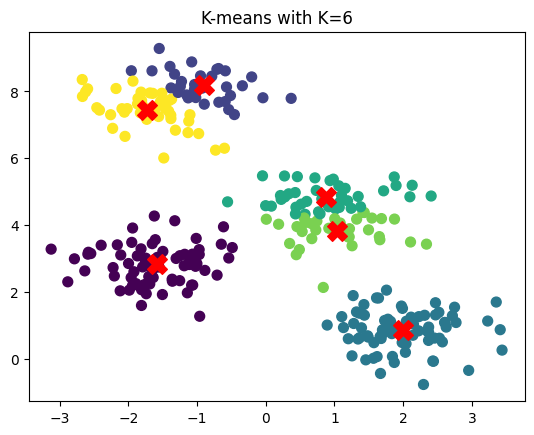

In [2]:
# Using inertia to determine the best K.
inertia_values = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# testing with different K values.
k_values = [2, 3, 5, 6]
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
    labels = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_
    plot_kmeans(X, labels, centroids, f"K-means with K={k}")